In [1]:
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [2]:
common_config.figure_journal_basic()

In [3]:
import pertpy as pt
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
adata = sc.read_h5ad("data/zhang_preprocessed.h5ad")
adata

AnnData object with n_obs × n_vars = 150504 × 4000
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'Cluster_colors', 'Efficacy_colors', 'Group_colors', 'Major celltype_colors', 'Treatment_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
adata.obs["Timepoint"] = adata.obs["Group"].copy()
adata.obs["Group"] = [f"{timepoint.split('-')[0]}-{response}" for timepoint, response in zip(adata.obs["Timepoint"], adata.obs["Efficacy"])]
adata.obs["Group"].value_counts()

Group
Pre-Partial response     57295
Pre-Stable disease       31924
Post-Stable disease      31626
Post-Partial response    29659
Name: count, dtype: int64

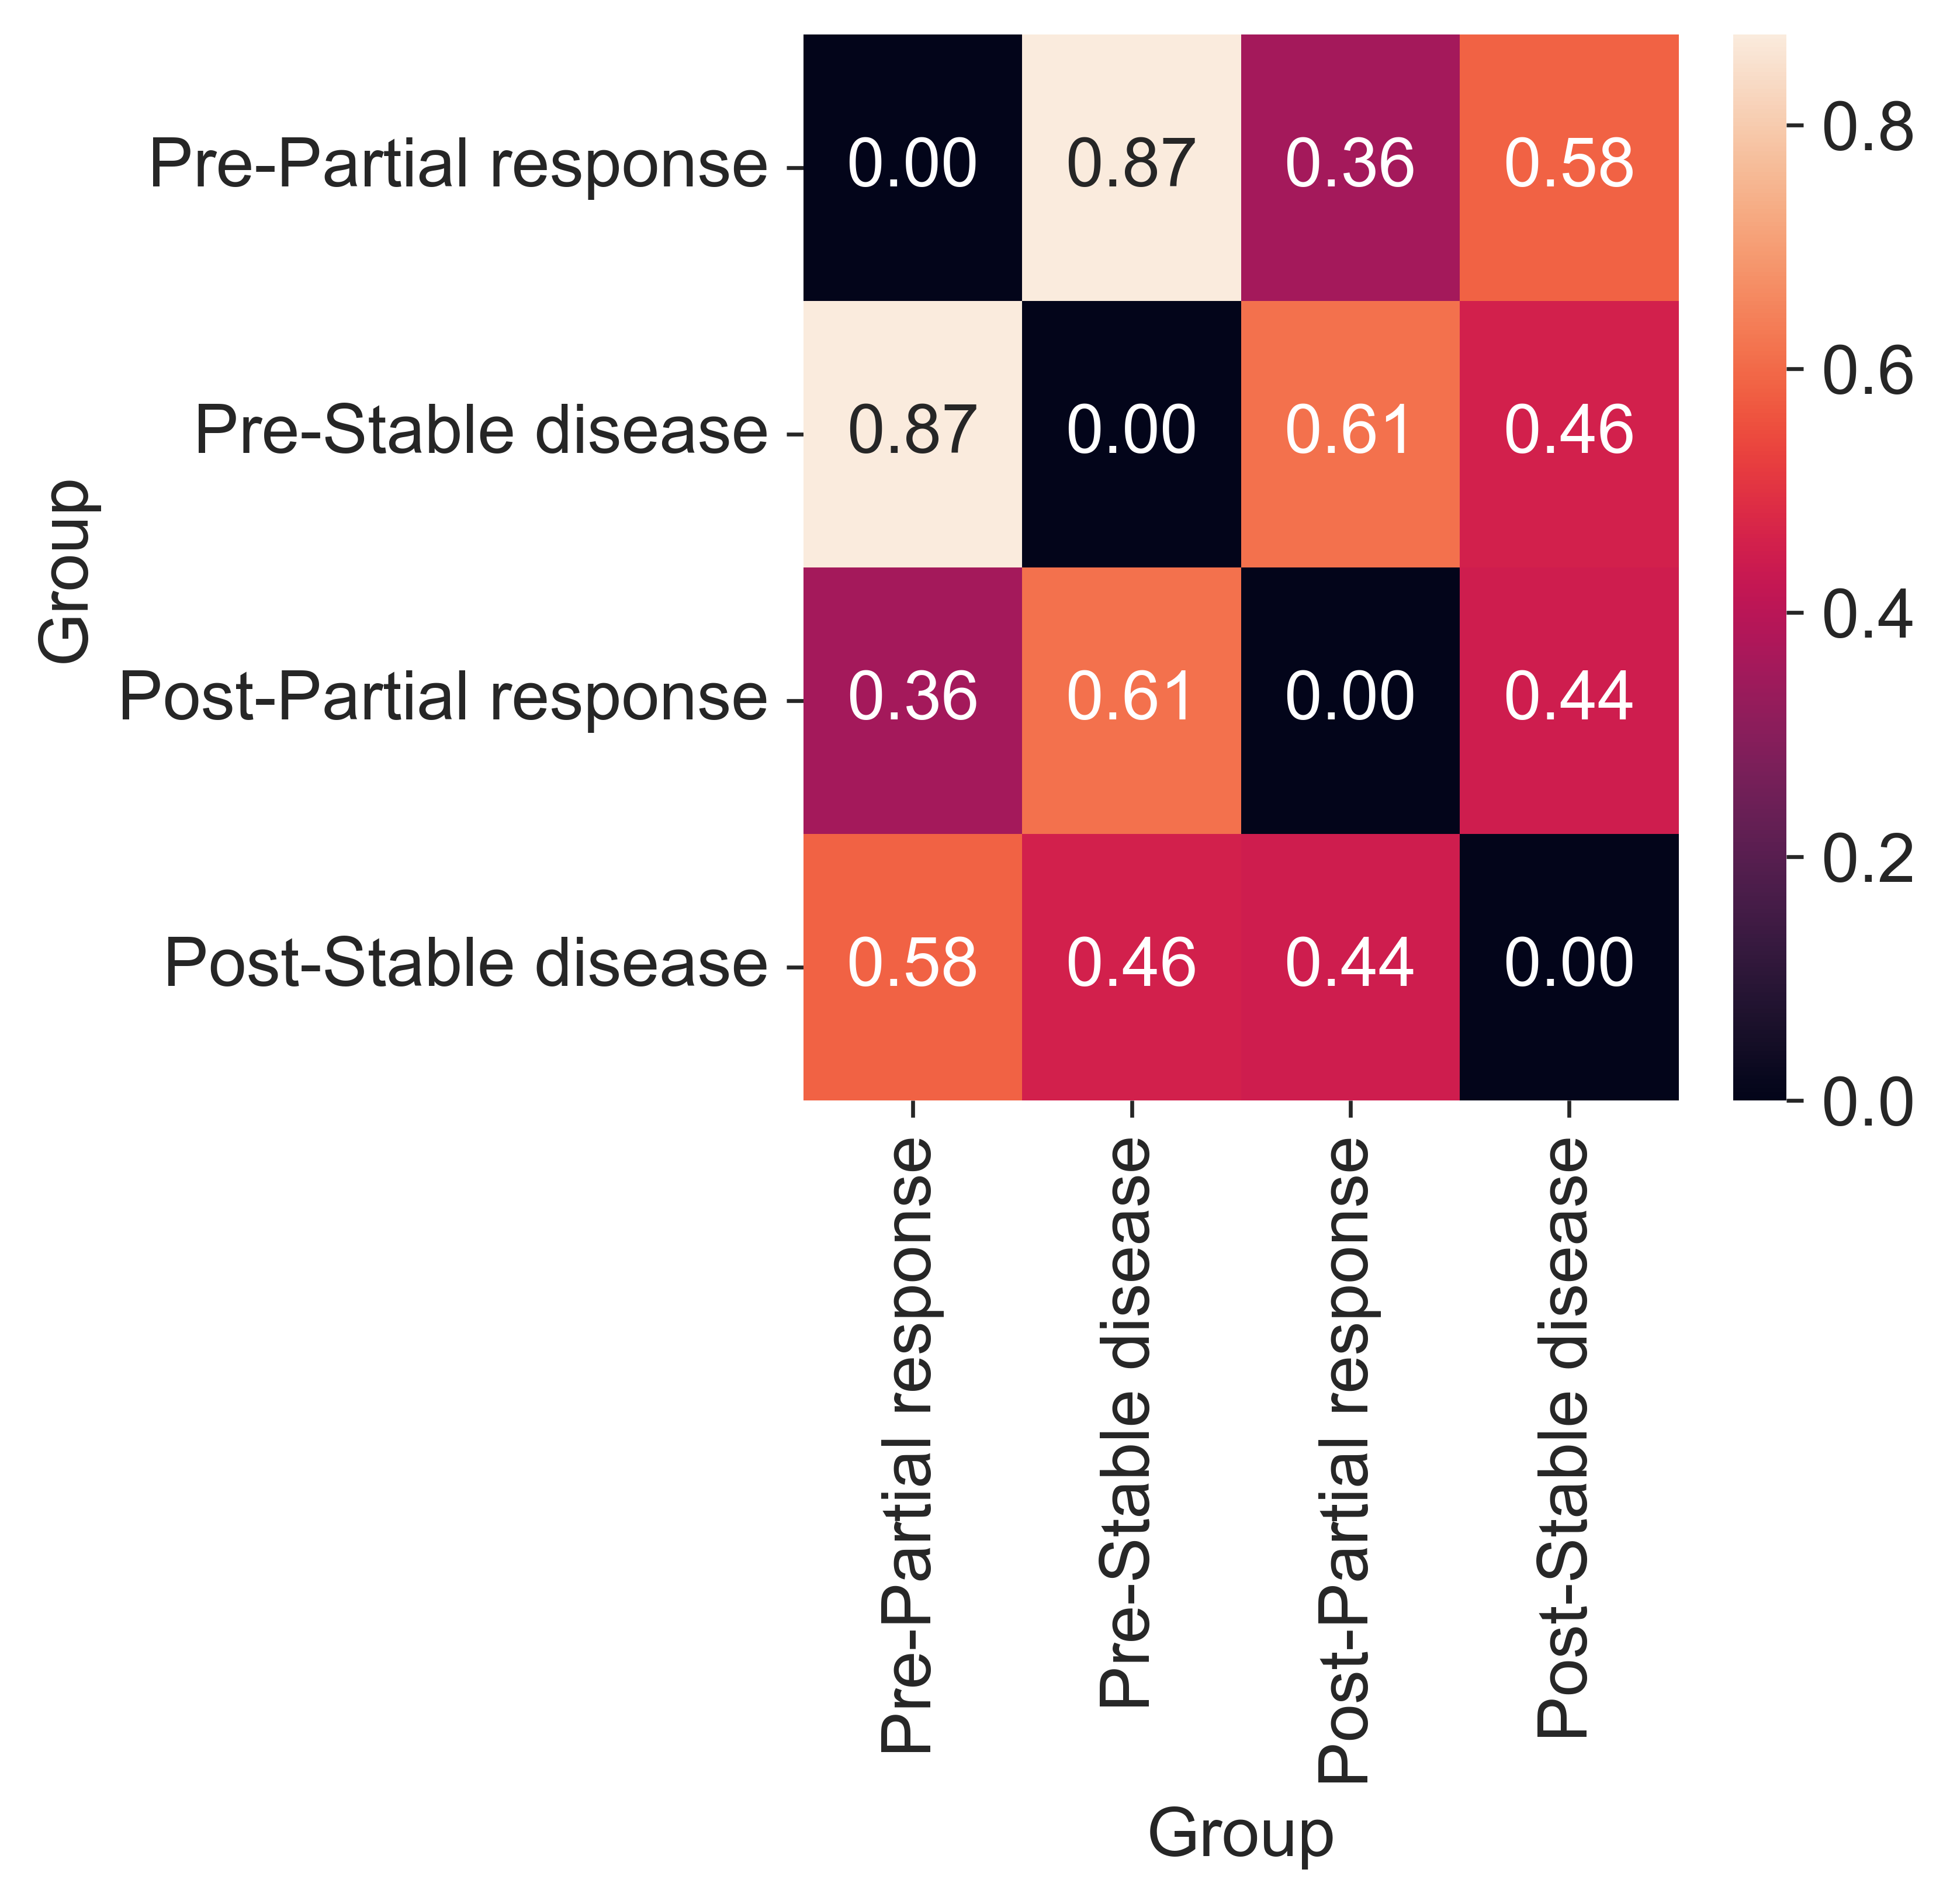

In [10]:
distance = pt.tl.Distance("mse", obsm_key="X_pca")
df = distance.pairwise(adata, groupby="Group", show_progressbar=False)

sns.heatmap(df, annot=True, fmt=".2f")
plt.savefig("figures/mse_distance_matrix.pdf", bbox_inches="tight")

In [12]:
def filter_data(adata_temp):
    isecs = pd.crosstab(adata_temp.obs["Cluster"], adata_temp.obs["Group"])
    celltypes = isecs[(isecs >0).all(axis=1)].index.values.tolist()
    adata_temp = adata_temp[adata_temp.obs["Cluster"].isin(celltypes)]
    return adata_temp

In [13]:
adata_chemo = adata[adata.obs["Treatment"] == "Chemo"]
adata_chemo = filter_data(adata_chemo)
adata_chemo.obs["Group"].value_counts()

Group
Post-Stable disease      20659
Pre-Partial response     16827
Post-Partial response    12137
Pre-Stable disease       11807
Name: count, dtype: int64

In [14]:
adata_chemo_pdl1 = adata[adata.obs["Treatment"] == "Anti-PD-L1+Chemo"]
adata_chemo_pdl1 = filter_data(adata_chemo_pdl1)
adata_chemo_pdl1.obs["Group"].value_counts()

Group
Pre-Partial response     40251
Post-Partial response    16379
Pre-Stable disease       13435
Post-Stable disease      10717
Name: count, dtype: int64

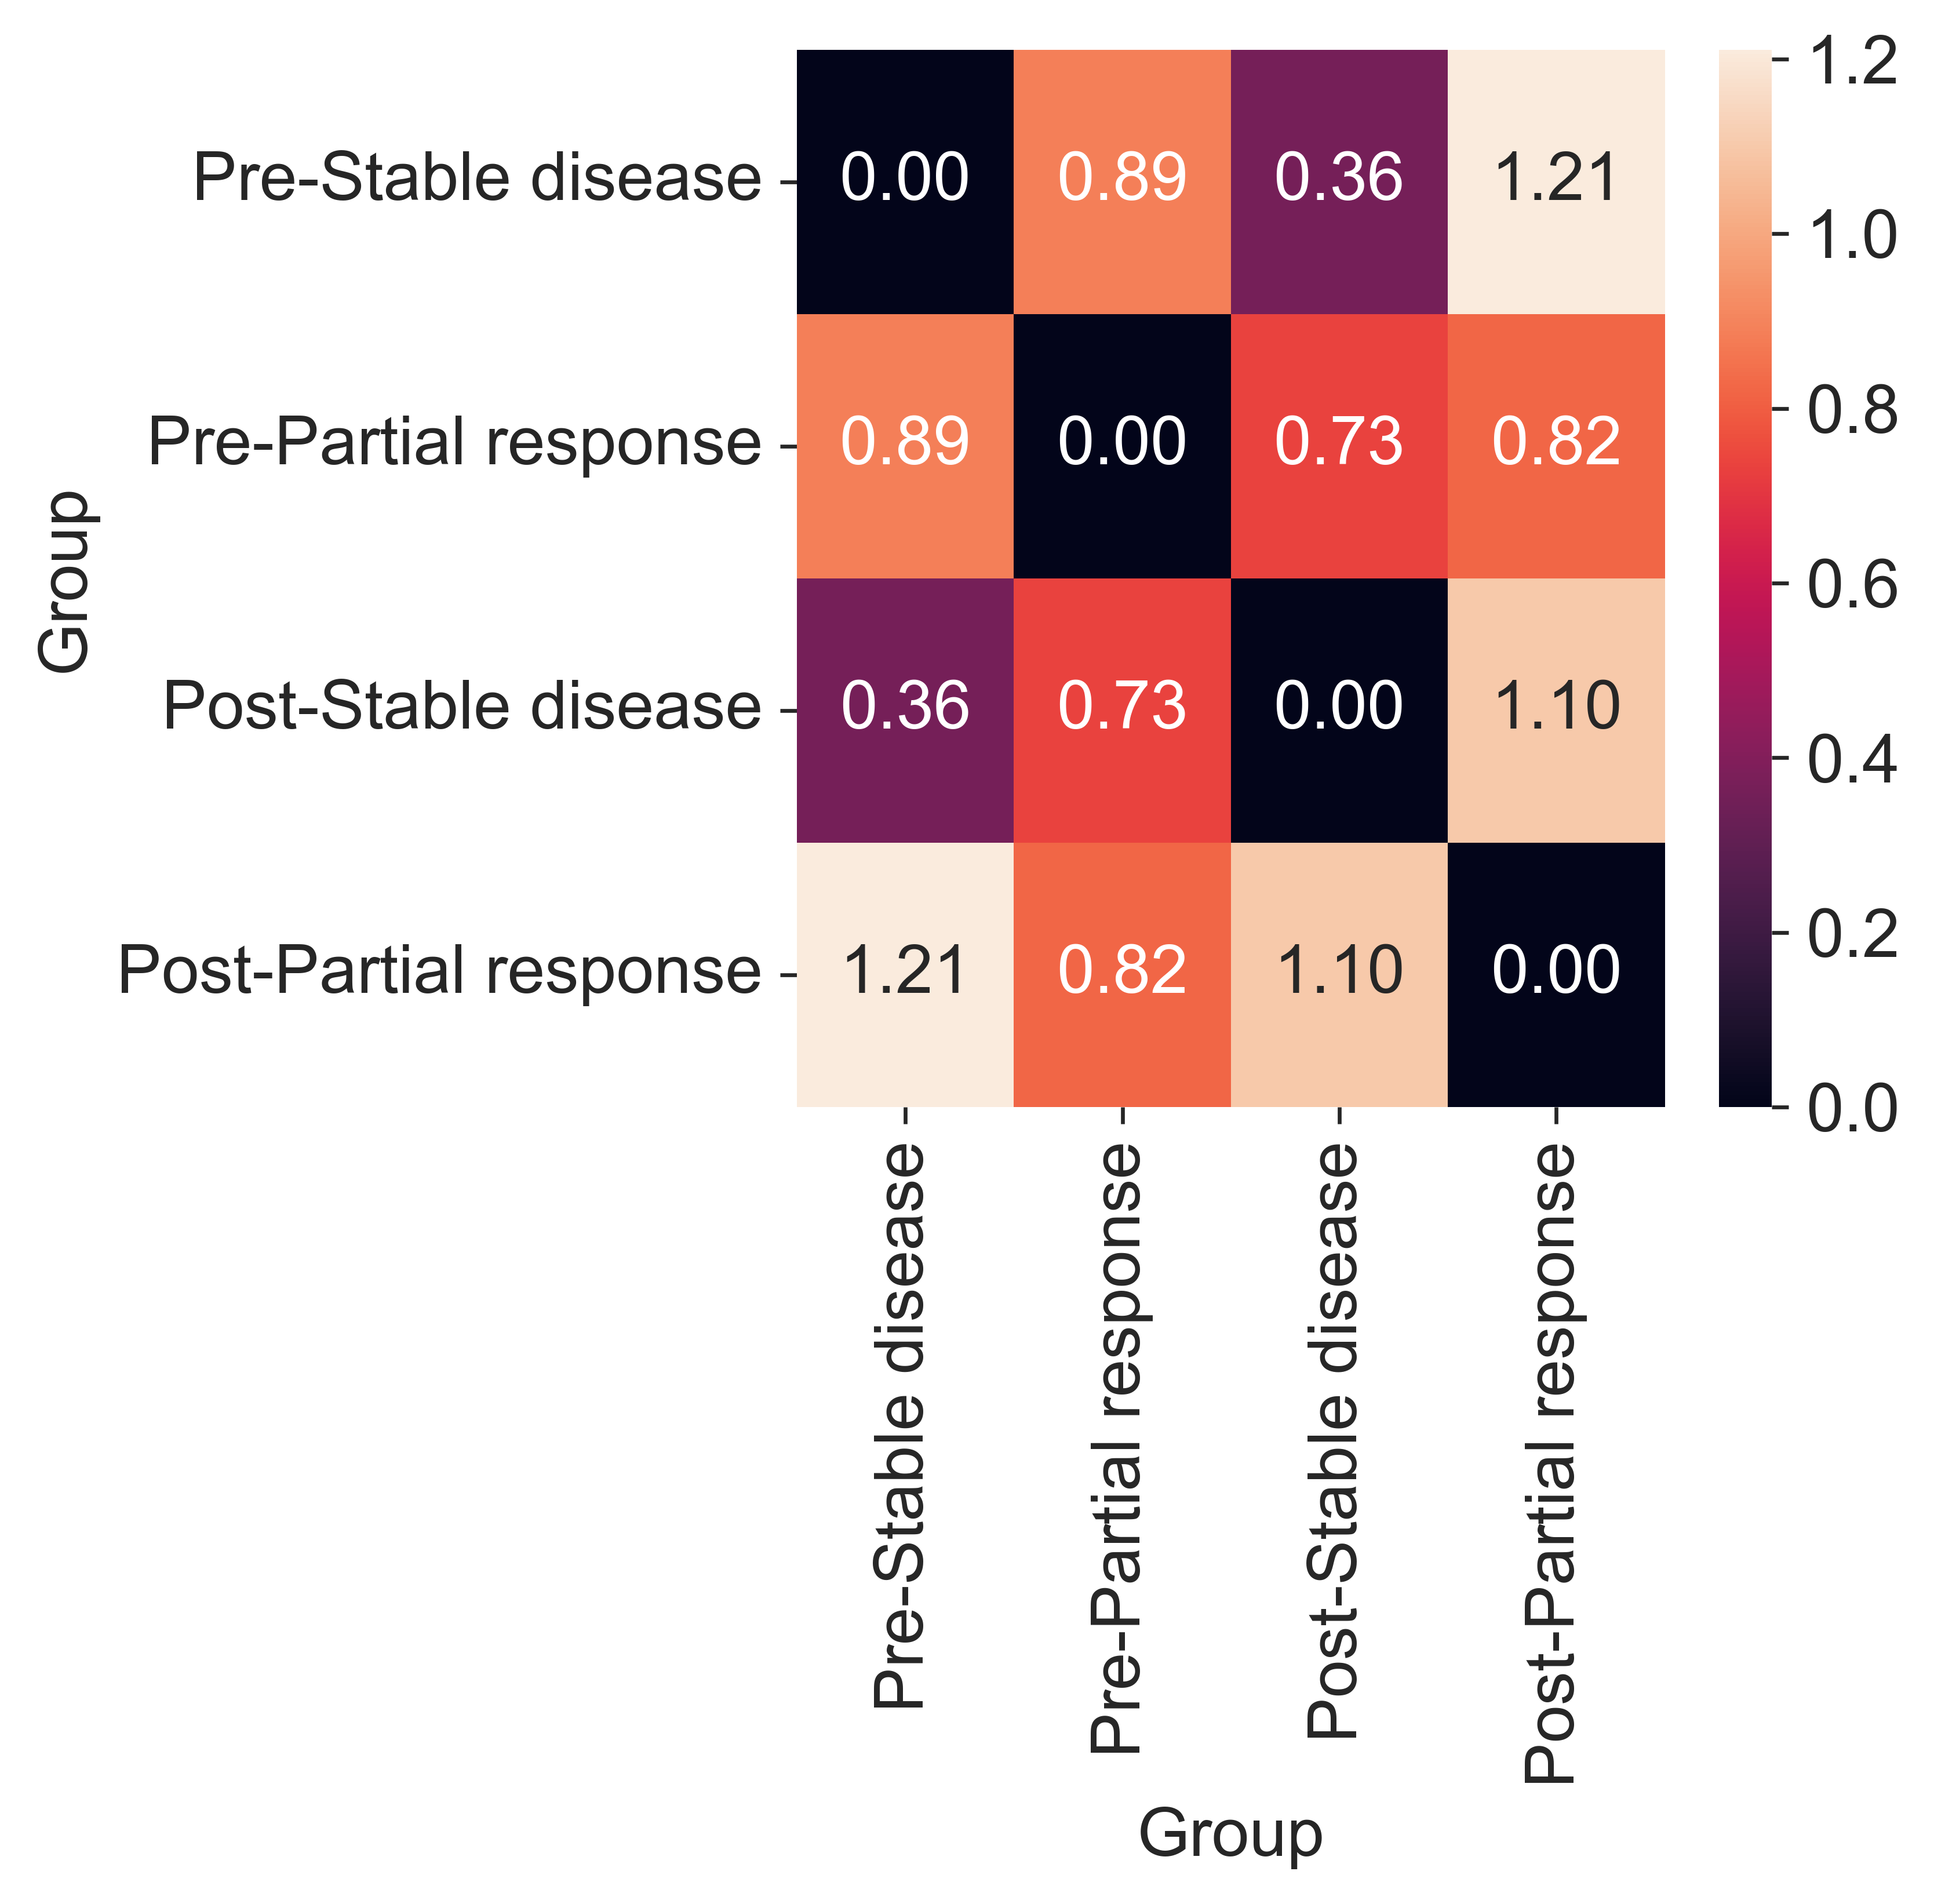

In [15]:
distance = pt.tl.Distance("mse", obsm_key="X_pca")
df = distance.pairwise(adata_chemo, groupby="Group", show_progressbar=False)

sns.heatmap(df, annot=True, fmt=".2f")
plt.savefig("figures/mse_distance_matrix_Chemo.pdf", bbox_inches="tight")

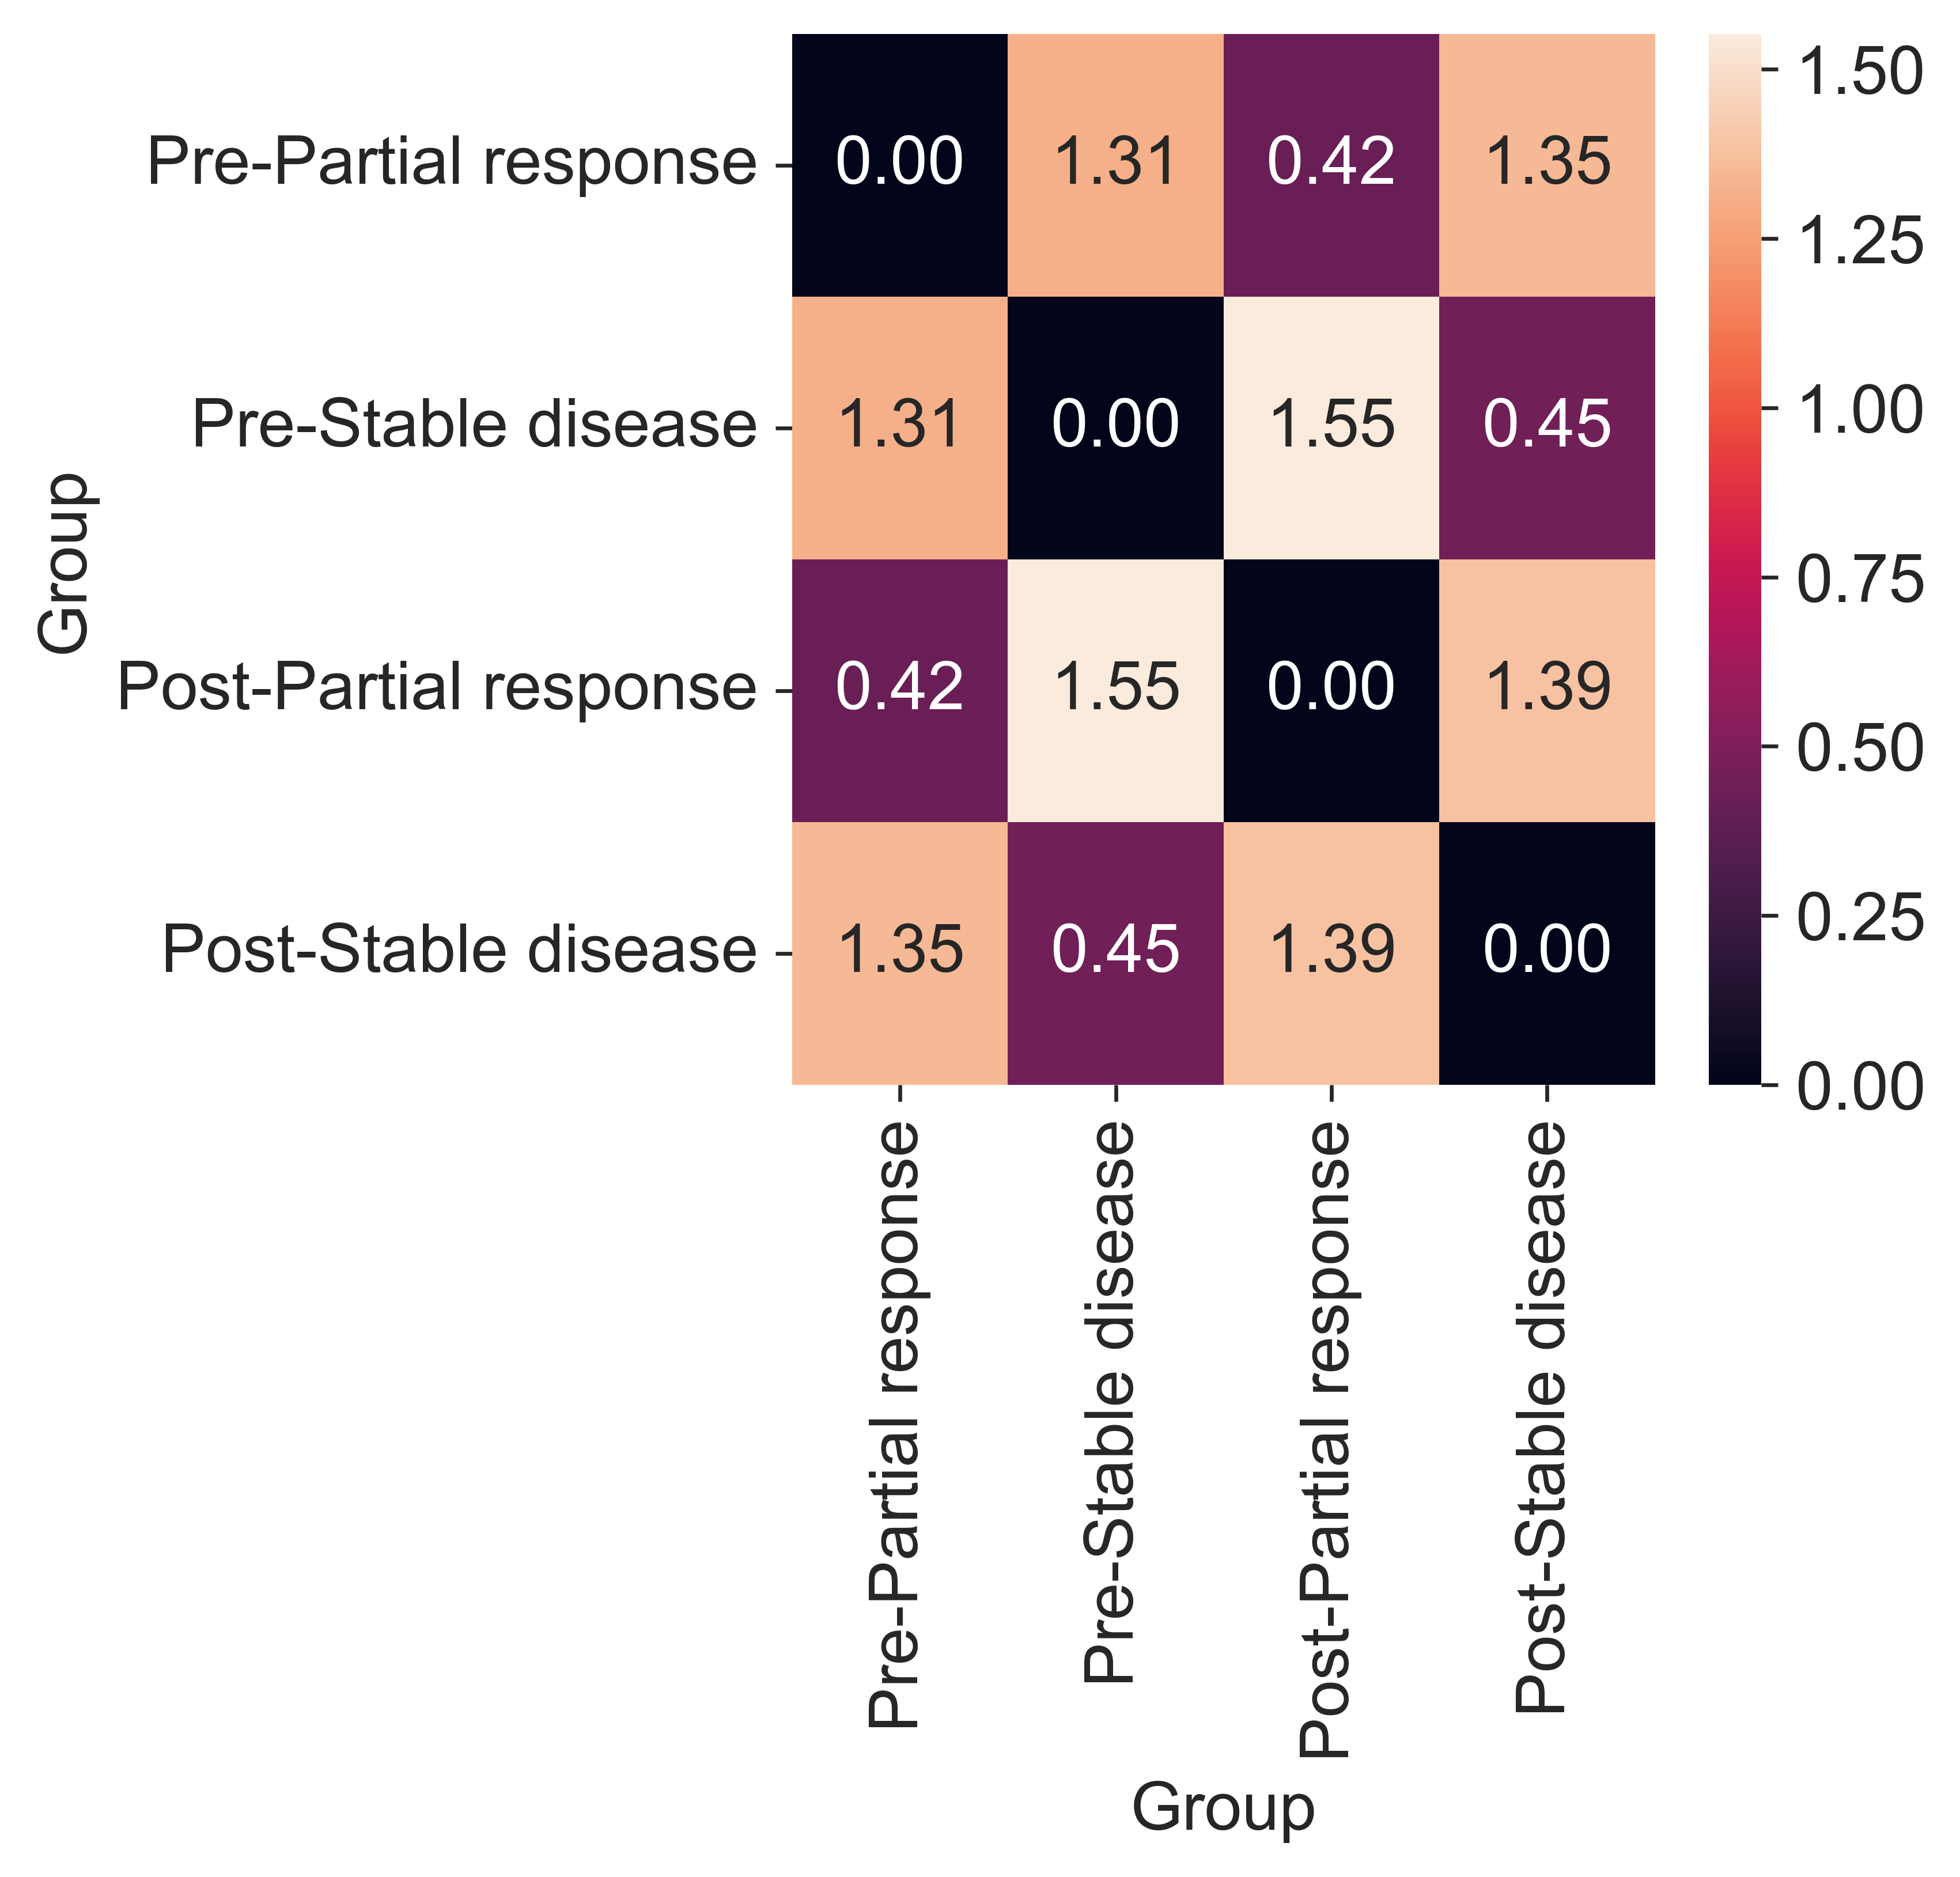

In [16]:
distance = pt.tl.Distance("mse", obsm_key="X_pca")
df = distance.pairwise(adata_chemo_pdl1, groupby="Group", show_progressbar=False)

sns.heatmap(df, annot=True, fmt=".2f")
plt.savefig("figures/mse_distance_matrix_Chemo_Anti_PDL1.pdf", bbox_inches="tight")